# A Statistical Look at Goals in Football

This analysis investigates whether more goals are scored in women's or men's international football matches. To ensure a focused comparison, I only considered official FIFA World Cup matches (excluding qualifiers) from 2002 onwards, keeping the data tidy and the analysis on target!

The question:

> Are more goals scored in women's international soccer matches than men's?

Using a significance level of **10% significance level**, and the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.


![soccer image](soccer_image.jpg)

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [3]:
# Load men's and women's datasets
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

In [11]:
# Check for null values
men.isna().sum()

Unnamed: 0    0
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64

In [12]:
# Check for nulls
women.isnull().sum()

Unnamed: 0    0
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64

In [10]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [13]:
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [18]:
# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] >= "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] >= "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

In [21]:
# Create group and goals_scored columns
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

C:\Users\Eby\AppData\Local\Temp\ipykernel_3888\3025180459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["group"] = "men"
C:\Users\Eby\AppData\Local\Temp\ipykernel_3888\3025180459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["group"] = "women"
C:\Users\Eby\AppData\Local\Temp\ipykernel_3888\3025180459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [22]:
men_subset

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1
...,...,...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup,men,3
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,men,3
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,men,2
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,men,3


### Determine normality using histograms

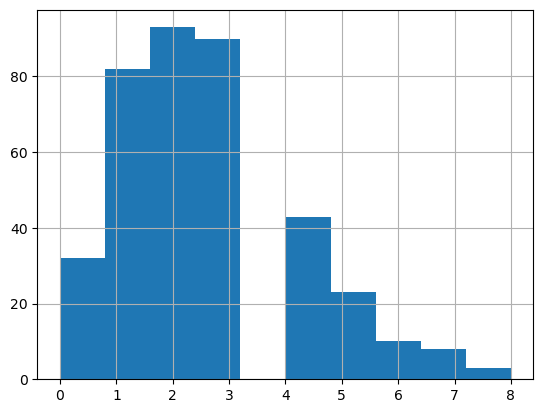

In [23]:
men_subset["goals_scored"].hist()
plt.show()

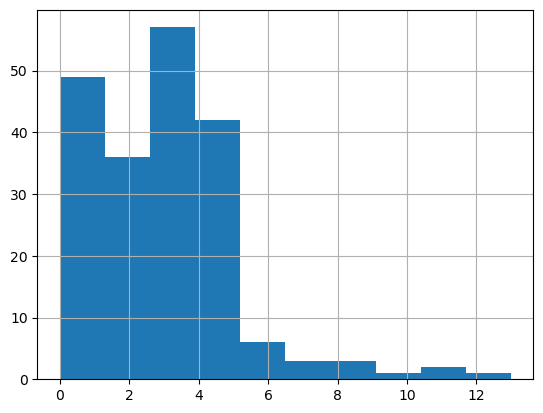

In [25]:
women_subset["goals_scored"].hist()
plt.show()

__Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups__

In [28]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

In [33]:
# Extract p-value as a float
p_val = round(results_scipy[1],4)

In [38]:
# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    decision = "reject null hypothesis"
else:
    decision = "fail to reject null hypothesis"

result_dict = {"p_val": p_val, "decision": decision}

for key, value in result_dict.items():
    print(key, ":", value)

p_val : 0.0051
decision : reject null hypothesis


---

## Conclusion
Based on your data and chosen significance level, there exists enough evidence to reject $H_0$ and conclude that the mean number of goals scored in women's international soccer matches is greater than in men's matches.